In [1]:
# Bibliotecas requeridas
!pip install opencv-python torch torchvision segment-anything


# El Segment Anything Model (SAM) de Meta es una herramienta muy potente para la segmentación de imágenes, 
# pero su objetivo principal es identificar y segmentar cualquier objeto en una imagen sin necesidad de 
# entrenamiento específico para cada objeto. Sin embargo, SAM no está diseñado para la detección de objetos 
# específicos, como identificar solo gatos en una imagen.

cpu


(np.float64(-0.5), np.float64(635.5), np.float64(489.5), np.float64(-0.5))

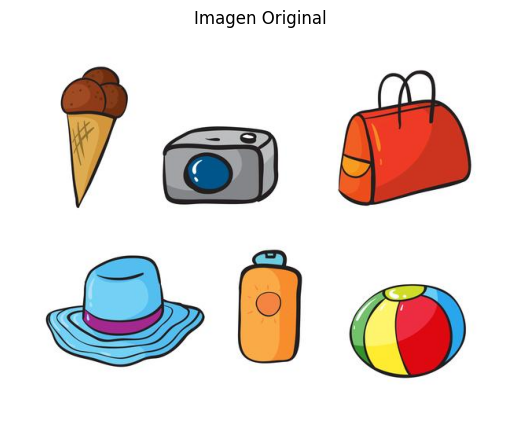

In [1]:
# Librerías y Variables Generales
import cv2 as cv
import torch
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# Ruta a la imagen
image_path = "Test07.jpg"

# Carga el modelo SAM
model_type_h = "vit_h"
model_type_l = "vit_l"
model_type_b = "vit_b"

# Ruta al modelo SAM
model_path_h = "C:\\SW\\Checkpoints\\sam_vit_h_4b8939.pth"
model_path_l = "C:\\SW\\Checkpoints\\sam_vit_l_0b3195.pth"
model_path_b = "C:\\SW\\Checkpoints\\sam_vit_b_01ec64.pth"

# Dispositivo a utilizar (CPU o GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Carga la imagen
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

print(device)

plt.figure(figsize=(10,5))
plt.imshow(image)
plt.title("Imagen Original")
plt.axis('off')

In [2]:
# Carga el modelo SAM
sam = sam_model_registry[model_type_h](checkpoint=model_path_h)
sam.to(device)
predictor = SamPredictor(sam)

In [4]:

# Variables globales para almacenar las coordenadas
x1, y1, x2, y2 = -1, -1, -1, -1
drawing = False

# Función de callback del mouse
def draw_rectangle(event, x, y, flags, param):
    global x1, y1, x2, y2, drawing

    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        x1, y1 = x, y

    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            x2, y2 = x, y

    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        x2, y2 = x, y
        print(f'Coordenadas: x1={x1}, y1={y1}, x2={x2}, y2={y2}')

# Cargar una imagen
image = cv.imread(image_path)

# Crear una ventana y asignar la función de callback del mouse
cv.namedWindow('image')
cv.setMouseCallback('image', draw_rectangle)

while True:
    img = image.copy()
    if x1 != -1 and y1 != -1 and x2 != -1 and y2 != -1:
        cv.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv.imshow('image', img)

    # Salir del bucle si se presiona la tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()


Coordenadas: x1=153, y1=104, x2=371, y2=240
Coordenadas: x1=402, y1=42, x2=607, y2=248


In [4]:
# Define las coordenadas del cuadro delimitador (ejemplo)
x1 = 0    # Coordenada x de la esquina superior izquierda
y1 = 0    # Coordenada y de la esquina superior izquierda
y2,x2,su = image.shape  # Coordenada x de la esquina inferior derecha
# y2 = 500  # Coordenada y de la esquina inferior derecha

# Realiza la segmentación
predictor.set_image(image)
input_box = np.array([x1, y1, x2, y2])  # Coordenadas del cuadro delimitador
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=True,
)

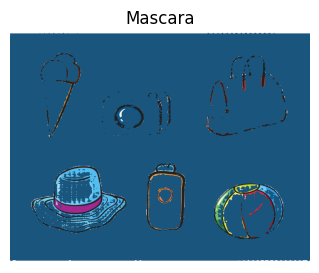

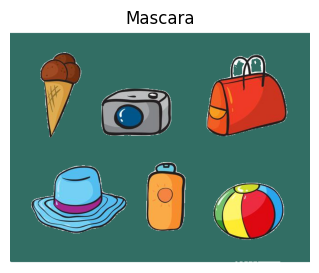

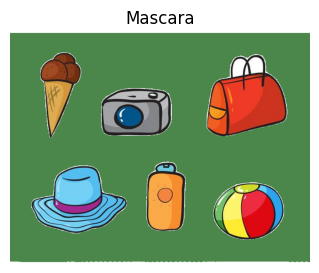

In [10]:
# Muestra las máscara
n=0
for mask in masks:
    n = n + 25
    image_with_mask = image.copy()
    image_with_mask[mask] = [0+n, 60+n, 150-n]  # Color verde para la máscara
    plt.figure(figsize=(6,3))
    plt.imshow(image_with_mask)
    plt.title("Mascara")
    plt.axis('off')
cv.waitKey(0)
cv.destroyAllWindows()

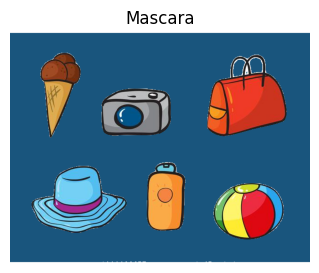

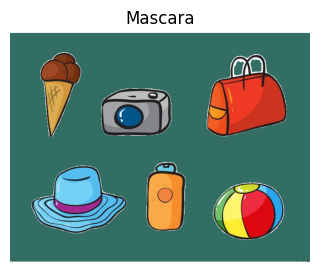

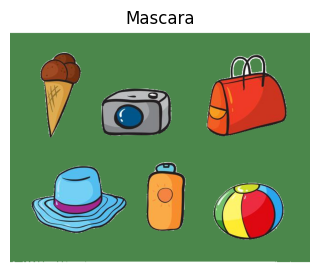

In [6]:
# Carga el modelo SAM
sam = sam_model_registry[model_type_l](checkpoint=model_path_l)
sam.to(device)
predictor = SamPredictor(sam)

# Realiza la segmentación
predictor.set_image(image)
input_box = np.array([x1, y1, x2, y2])  # Coordenadas del cuadro delimitador
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=True,
)

# Muestra las máscara
n=0
for mask in masks:
    n = n + 25
    image_with_mask = image.copy()
    image_with_mask[mask] = [0+n, 60+n, 150-n]  # Color verde para la máscara
    plt.figure(figsize=(6,3))
    plt.imshow(image_with_mask)
    plt.title("Mascara")
    plt.axis('off')
cv.waitKey(0)
cv.destroyAllWindows()

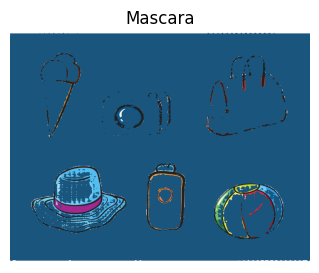

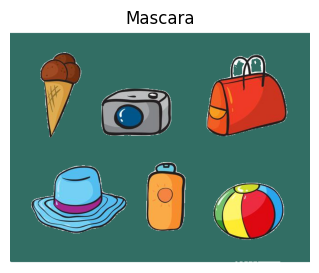

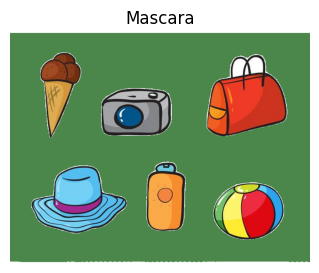

In [7]:
# Carga el modelo SAM
sam = sam_model_registry[model_type_b](checkpoint=model_path_b)
sam.to(device)
predictor = SamPredictor(sam)

# Realiza la segmentación
predictor.set_image(image)
input_box = np.array([x1, y1, x2, y2])  # Coordenadas del cuadro delimitador
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=True,
)

# Muestra las máscara
n=0
for mask in masks:
    n = n + 25
    image_with_mask = image.copy()
    image_with_mask[mask] = [0+n, 60+n, 150-n]  # Color verde para la máscara
    plt.figure(figsize=(6,3))
    plt.imshow(image_with_mask)
    plt.title("Mascara")
    plt.axis('off')
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
from PIL import Image

# Cargar el modelo SAM (asegúrate de tener el archivo de peso del modelo)
model = torch.load(model_path_h)
model.eval()

# Función para cargar y preprocesar la imagen
def load_image(model_type_h):
    image = Image.open(image_path).convert('RGB')
    transform = T.Compose([
        T.Resize((256, 256)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0)
    return image

# Función para segmentar la imagen
def segment_image(model, image):
    with torch.no_grad():
        output = model(image)
    # Convertir la salida en una máscara binaria
    mask = output['out'].squeeze().detach().cpu().numpy()
    mask = (mask > 0.5).astype(np.uint8)
    return mask

# Ruta a la imagen que deseas segmentar
image_path = 'ruta_a_la_imagen.jpg'
image = load_image(image_path)

# Realizar la segmentación
mask = segment_image(model, image)

# Guardar la máscara segmentada
mask_image = Image.fromarray(mask * 255)
mask_image.save('mascara_segmentada.png')

print("Segmentación completada y máscara guardada como 'mascara_segmentada.png'")


AttributeError: 'dict' object has no attribute 'eval'